In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('complaints.csv', index_col=0)

In [3]:
df.shape

(162415, 2)

In [4]:
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [5]:
df.isna().sum()

product       0
narrative    10
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df['product'].value_counts()

credit_reporting       91171
debt_collection        23145
mortgages_and_loans    18990
credit_card            15564
retail_banking         13535
Name: product, dtype: int64

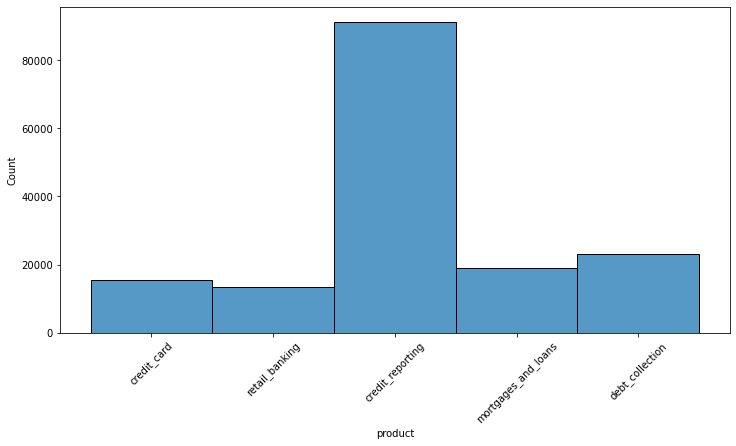

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x="product", ax=ax)
ax.tick_params(axis='x', labelrotation=45)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Text cleaning

In [9]:
# Some text samples

print(df['narrative'][24])
print()
print(df['narrative'][42])
print()
print(df['narrative'][123])

originally reached well fargo apply refinancing mortgage currently hold submitted application paid upfront fee applied survey documentation paperwork completed loan submitted approval final decision forthcoming within week notified loan rejected due debt income ratio better credit score last approved le year ago since eliminated different monthly mortgage payment would reduce current mortgage year year p l reflects higher income current apr would reduced thank help

open account acct opened balance account acct opened balance account closed account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account acct opened balance account

attached first qualified written request qwr item required select portfolio servicing sps prove standing collect mortgage payment withou

In [10]:
# Text appears to have been pre-cleaned of punctuation etc. and lower case
# also
# data explotation highlights how:
print(df['narrative'][205])
print()
print(df['narrative'][210])
print()
print(df['narrative'][220])


block except otherwise provided section consumer reporting agency shall block reporting information file consumer consumer identifies information resulted alleged identity theft later business day date receipt agency appropriate proof identity consumer copy identity theft report identification information consumer statement consumer information information relating transaction consumer b notification consumer reporting agency shall promptly notify furnisher information identified consumer subsection section information may result identity theft identity theft report filed block requested section effective date block c authority decline rescind general consumer reporting agency may decline block may rescind block information relating consumer section consumer reporting agency reasonably determines information blocked error block requested consumer error b information blocked block requested consumer basis material misrepresentation fact consumer relevant request block c consumer obtaine

In [11]:
df.groupby(['narrative'],as_index=False).size().sort_values(['size'], ascending=False).head(10)

,narrative,size
118107,victim identity notified collection creditor s...,739
533,account added created unbeknownst notice conce...,415
44020,filed dispute regard incorrect item credit rep...,338
118262,victim identity theft due corona virus pandemi...,306
118116,victim identity theft,271
96336,see multiple day late mark clear violation rig...,263
98777,sent letter regarding inaccurate unknown thing...,259
43786,filed dispute credit reporting agency regard i...,241
43784,filed dispute credit reporting agency regard i...,237
2026,account listed credit report never opened acco...,228


- Should we deal with this?
- How do we deal with this?

In [12]:

import re, nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.extend(['example'])

def clean_text(text):                                         
     # Remove stop_word
    words = word_tokenize(text)
    new_text = ""
    for i,w in enumerate(words):
        if w not in stop_words and len(w) > 3:
            new_text = new_text + " " + w
    return new_text

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

from nltk import word_tokenize, pos_tag

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatize_tag(text):
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        lm = ''
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lm = wnl.lemmatize(i,p)
        else :
            lm = wnl.lemmatize(i)
        if len(lm) > 1:
            lemma.append(lm)
    return ' '.join(lemma)

[nltk_data] Downloading package punkt to /home/andrea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/andrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/andrea/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/andrea/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df['cleaned_narrative'] = df['narrative'].apply(clean_text)
df['cleaned_narrative'] = df['cleaned_narrative'].apply(lemmatize_tag)

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.to_csv('complaints_cleaned.csv')